<a href="https://colab.research.google.com/github/druvz/Practice/blob/master/markov_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create Markov chain

In [1]:
import numpy as np
import random as rm

In [2]:
# The statespace
states = ["Sleep","Icecream","Run"]

# Possible sequences of events
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# Probabilities matrix (transition matrix)
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

In [3]:
if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[1]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay, you should move on!! ;)")

All is gonna be okay, you should move on!! ;)


In [4]:
# A function that implements the Markov model to forecast the state/mood.
def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    print("Start state: " + activityToday)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [activityToday]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1  
    print("Possible states: " + str(activityList))
    print("End state after "+ str(days) + " days: " + activityToday)
    print("Probability of the possible sequence of states: " + str(prob))

# Function that forecasts the possible state for the next 2 days
activity_forecast(2)

Start state: Sleep
Possible states: ['Sleep', 'Sleep', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.12


You get a random set of transitions possible along with the probability of it happening, starting from state: Sleep. Extend the program further to maybe iterate it for a couple of hundred times with the same starting state, you can then see the expected probability of ending at any particular state along with its probability. Let's rewrite the function activity_forecast and add a fresh set of loops to do this...

In [5]:
def activity_forecast(days):
    # Choose the starting state
    activityToday = "Sleep"
    activityList = [activityToday]
    i = 0
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1    
    return activityList

# To save every activityList
list_activity = []
count = 0

# `Range` starts from the first count up until but excluding the last count
for iterations in range(1,10000):
        list_activity.append(activity_forecast(2))

# Check out all the `activityList` we collected    
#print(list_activity)

# Iterate through the list to get a count of all activities ending in state:'Run'
for smaller_list in list_activity:
    if(smaller_list[2] == "Run"):
        count += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (count/10000) * 100
print("The probability of starting at state:'Sleep' and ending at state:'Run'= " + str(percentage) + "%")

The probability of starting at state:'Sleep' and ending at state:'Run'= 62.46000000000001%


Alternate Approach for markov chain

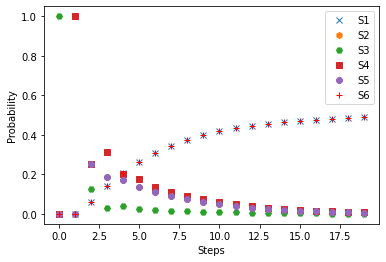

In [6]:
import numpy as np
from matplotlib import pyplot

P = np.matrix(
    [
        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [1.0 / 4, 1.0 / 2, 0.0, 1.0 / 4, 0.0, 0.0],
        [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
        [1.0 / 16, 1.0 / 4, 1.0 / 8, 1.0 / 4, 1.0 / 4, 1.0 / 16],
        [0.0, 0.0, 0.0, 1.0 / 4, 1.0 / 2, 1.0 / 4],
        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    ]
)

v = np.matrix([[0, 0, 1, 0, 0, 0]])

# Get the data
plot_data = []
for step in range(20):
    result = v * P ** step
    plot_data.append(np.array(result).flatten())

# Convert the data format
plot_data = np.array(plot_data)

# Create the plot
pyplot.figure(1)
pyplot.xlabel("Steps")
pyplot.ylabel("Probability")
lines = []
for i, shape in zip(range(6), ["x", "h", "H", "s", "8", "r+"]):
    (line,) = pyplot.plot(plot_data[:, i], shape, label="S%i" % (i + 1))
    lines.append(line)
pyplot.legend(handles=lines, loc=1)
pyplot.show()

In [9]:
$ pip search markov
PyMarkovChain             - Simple markov chain implementation
autocomplete              - tiny 'autocomplete' tool using a "hidden markov model"
cobe                      - Markov chain based text generator library and chatbot
twitter_markov            - Create markov chain ("_ebooks") accounts on Twitter
markovgen                 - Another text generator based on Markov chains.
pyEMMA                    - EMMA: Emma's Markov Model Algorithms
pymc                      - Markov Chain Monte Carlo sampling toolkit.
hmmus                     - Posterior decoding with a hidden Markov model
marbl-python              - A Python implementation of the Marbl specification for normalized representations of Markov blankets in Bayesian networks.
pymdptoolbox              - Markov Decision Process (MDP) Toolbox
gibi                      - Generate random words based on Markov chains
markovgenerator           - Markov text generator
pythonic-porin            - Nanopore Data Analysis package. Provides tools for reading data,        performing event detection, segmentation, visualization, and
                            analysis using        hidden Markov models, and other tools. Designed for the UCSC Nanopore Group.
PyMarkovTextGenerator     - Random text generator base on Markov chains.
MCREPOGEN                 - Markov Chain Repository Generator
vokram                    - A toy Markov chain implementation.
MarkovEquClasses          - Algorithms for exploring Markov equivalence classes: MCMC, size counting
hmmlearn                  - Hidden Markov Models in Python with scikit-learn like API
twarkov                   - Markov generator built for generating Tweets from timelines
MCL_Markov_Cluster        - Markov Cluster algorithm implementation
pyborg                    - Markov chain bot for irc which generates replies to messages
pydodo                    - Markov chain generator
mwordgen                  - MWordGen is a Markov statistics based word generator.
Markov                    - Python library for Hidden Markov Models
markovify                 - Use Markov chains to generate random semi-plausible sentences based on an existing text.
treehmm                   - Variational Inference for tree-structured Hidden-Markov Models
PyMarkov                  - Markov Chains made easy

SyntaxError: ignored

Quantecon

In [13]:
pip install  quantecon

     |████████████████████████████████| 240 kB 3.1 MB/s 


In [14]:
P = np.zeros((6, 6))
P[0, 0] = 1
P[1, 4] = 1
P[2, [2, 3, 4]] = 1/3
P[3, [0, 5]] = 1/2
P[4, [1, 4]] = 1/2
P[5, [0, 3]] = 1/2

In [16]:
import matplotlib.pyplot as plt
from quantecon.markov import MarkovChain
mc1 = MarkovChain(P)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Classification of states

In [18]:
mc1.is_irreducible

False

In [19]:
mc1.num_communication_classes

4

Determine the communication classes:

In [20]:
mc1.communication_classes

[array([0]), array([1, 4]), array([3, 5]), array([2])]

Classify the states of this Markov chain:

In [21]:
mc1.recurrent_classes

[array([0]), array([1, 4])]

Obtain a list of the recurrent states:

In [23]:
recurrent_states = np.concatenate(mc1.recurrent_classes)
print(recurrent_states)

[0 1 4]


Obtain a list of the transient states:

In [24]:
transient_states = np.setdiff1d(np.arange(mc1.n), recurrent_states)
print(transient_states)

[2 3 5]


A Markov chain is reducible (i.e., its directed graph is not strongly connected) if and only if by symmetric permulations of rows and columns, its transition probability matrix is written in the form ("canonical form")

(UW0V),
(
U	0	W	V 
)
,
where U and W are square matrices.

Such a form for mc1 is obtained by the following

In [25]:
permutation = np.concatenate([recurrent_states, transient_states])
print(mc1.P[np.ix_(permutation, permutation)])

[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.5        0.         0.         0.         0.         0.5       ]
 [0.5        0.         0.         0.         0.5        0.        ]]


This Markov chain is aperiodic (i.e., the least common multiple of the periods of the recurrent sub-chains is one):

In [26]:
mc1.is_aperiodic

True

Indeed, each of the sub-chains corresponding to the recurrent classes has period 1, i.e., every recurrent state is aperiodic:

In [27]:
for recurrent_class in mc1.recurrent_classes:
    sub_matrix = P[np.ix_(recurrent_class, recurrent_class)]
    d = MarkovChain(sub_matrix).period
    print('Period of the sub-chain\n{0}\n = {1}'.format(sub_matrix, d))

Period of the sub-chain
[[1.]]
 = 1
Period of the sub-chain
[[0.  1. ]
 [0.5 0.5]]
 = 1


Stationary distributions

For each recurrent class C, there is a unique stationary distribution ψC such that ψ
C
i
>0 for all i∈C and ψ
C
i
=0 otherwise. MarkovChain.stationary_distributions returns these unique stationary distributions for the recurrent classes. Any stationary distribution is written as a convex combination of these distribution

In [28]:
print(mc1.stationary_distributions)

[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.66666667 0.        ]]


Plot these distributions.

In [29]:
def draw_histogram(distribution, ax=None, figsize=None,
                   title=None, xlabel=None, ylabel=None, ylim=(0, 1)):
    """
    Plot the given distribution.
    
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    n = len(distribution)
    ax.bar(np.arange(n), distribution, align='center')
    ax.set_xlim(-0.5, (n-1)+0.5)
    ax.set_ylim(*ylim)
    ax.set_xticks(range(n))
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    if ax is None:
        plt.show()

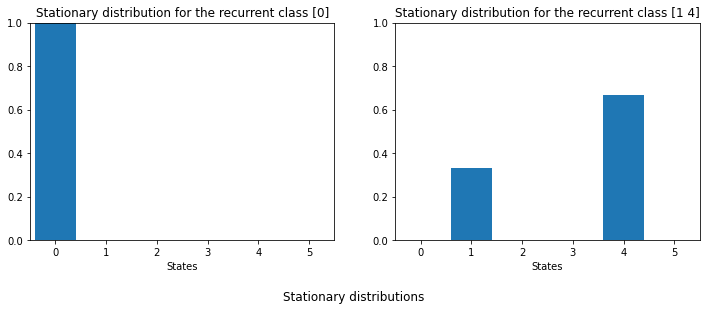

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
titles = ['Stationary distribution for the recurrent class {0}'.format(recurrent_class)
          for recurrent_class in mc1.recurrent_classes]

for ax, title, dist in zip(axes, titles, mc1.stationary_distributions):
    draw_histogram(dist, ax=ax, title=title, xlabel='States')

fig.suptitle('Stationary distributions', y=-0.05, fontsize=12)
plt.show()

Simulation

Let us simulate our Markov chain mc1. The simualte method generates a sample path of length given by the first argument, ts_length, with an initial state as specified by an optional argument init; if not specified, the initial state is randomly drawn

A sample path from state 0:

In [31]:
mc1.simulate(50, init=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

As is clear from the transition matrix P, if it starts at state 0, the chain stays there forever, i.e., 0 is an absorbing state, a state that constitutes a singleton recurrent class.

Start with state 1:

In [32]:
mc1.simulate(50, init=1)

array([1, 4, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1,
       4, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 4, 1, 4])

You can observe that the chain stays in the recurrent class {1,4} and visits states 1 and 4 with certain frequencies


If init is not specified, the initial state is randomly chosen:

In [33]:
mc1.simulate(50)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

Note on reproducibility: The simulate method offers an option random_state to set a random seed to initialize the pseudo-random number generator. As you provide the same random seed value, simulate returns the same outcome.

For example, the following will always give the same sequence:

In [34]:
mc1.simulate(50, random_state=12345)

array([2, 4, 1, 4, 4, 4, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 4,
       4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4,
       1, 4, 4, 4, 4, 4])

Time series averages

Now, let us compute the frequency distribution along a sample path, given by

1
t
 
t−1
∑
τ=0 1{Xτ=s}(s∈S)

In [35]:
def time_series_dist(mc, t, init=None, random_state=None):
    """
    Return the distribution of visits by a sample path of length t
    of mc with an initial state init.
    
    """
    t_max = np.max(t)
    dim = 1
    try:
        ts_size = len(t)  # t is an array
        ts_array = t
        dim = 2
    except:  # t is an int
        ts_size = 1
        ts_array = [t]
        
    X = mc.simulate(ts_length=t_max, init=init, random_state=random_state)
    dists = np.empty((ts_size, mc.n))
    bins = np.arange(mc.n+1)
    for i, length in enumerate(ts_array):
        hist, bin_edges = np.histogram(X[:length], bins=bins)
        dists[i, :] = hist / length
    if dim == 1:
        return dists[0]
    else:
        return dists

Here is a frequency distribution along a sample path, of length 100, from initial state 1, which is a recurrent state:

In [36]:
time_series_dist(mc1, t=100, init=1)

array([0.  , 0.35, 0.  , 0.  , 0.65, 0.  ])

Length 10,000:

In [37]:
time_series_dist(mc1, t=10**4, init=1)

array([0.    , 0.3324, 0.    , 0.    , 0.6676, 0.    ])

The distribution becomes close to the stationary distribution (0, 1/3, 0, 0, 2/3, 0)

Plot the frequency distributions for a couple of different time lengths:

In [38]:
def plot_time_series_dists(mc, init, ts, seed=None, figsize=(12,4)):
    dists = time_series_dist(mc, t=ts, init=init, random_state=seed)

    fig, axes = plt.subplots(1, len(ts), figsize=figsize)
    titles = ['t={0}'.format(t) for t in ts]

    for ax, title, dist in zip(axes, titles, dists):
        draw_histogram(dist, ax=ax, title=title, xlabel='States')

    fig.suptitle('Time series distributions with init={0}'.format(init),
                 y=-0.05, fontsize=12)
    plt.show()

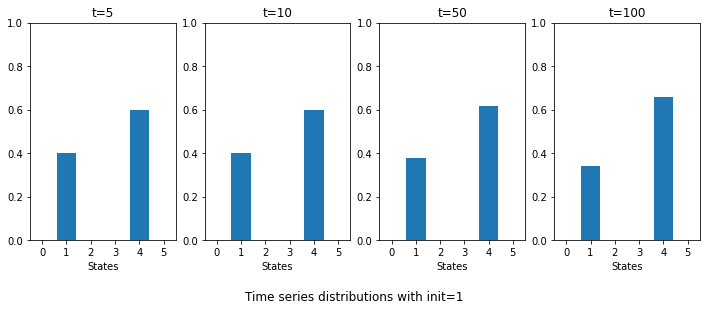

In [39]:
init = 1
ts = [5, 10, 50, 100]
plot_time_series_dists(mc1, init, ts)

Start with state 2, which is a transient state:

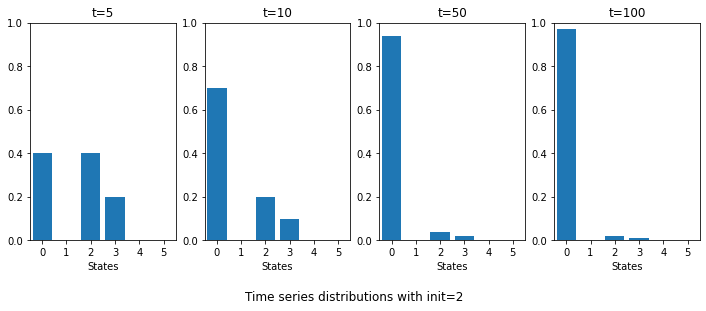

In [40]:
init = 2
ts = [5, 10, 50, 100]
plot_time_series_dists(mc1, init, ts)

Run the above cell several times; you will observe that the limit distribution differs across sample paths. Sometimes the state is absorbed into the recurrent class {0}, while other times it is absorbed into the recurrent class {1,4}.

Some sample path with init=2


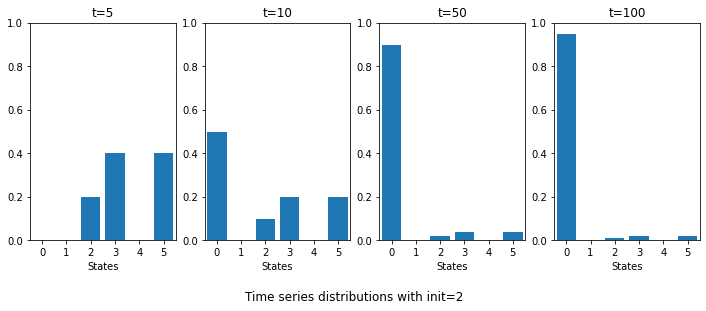

Another sample path with init=2


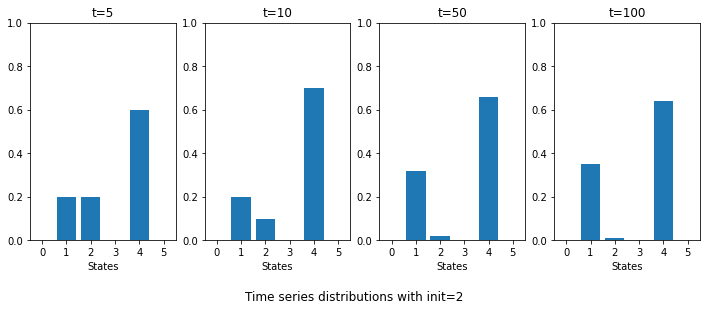

In [41]:
init = 2
ts = [5, 10, 50, 100]
seeds = [222, 2222]
descriptions = ['{0} sample path with init={1}'.format(adjective, init) for adjective
                in ['Some'] + ['Another'] + ['Yet another']*(len(seeds)-1)]

for seed, description in zip(seeds, descriptions):
    print(description)
    plot_time_series_dists(mc1, init, ts, seed=seed)

In fact, for almost every sample path of a finite Markov chain {Xt}, for some recurrent class C we have

1
t
 
t−1
∑
τ=0 1{Xτ=s}→ψC[s]as t→∞
for all states s, where ψC is the stationary distribution associated with the recurrent class C.

If the initial state s0 is a recurrent state, then the recurrent class C above is the one that contains s0, while if it is a transient state, then the recurrent class to which the convergence occurs depends on the sample path.

Let us simulate with the remaining states, 3, 4, and 5.

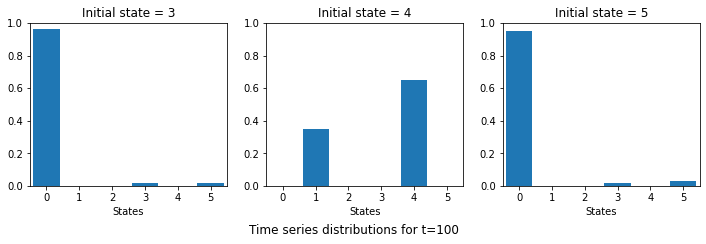

In [42]:
inits = [3, 4, 5]
t = 100

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for init, ax in zip(inits, axes):
    draw_histogram(time_series_dist(mc1, t=t, init=init), ax=ax,
                   title='Initial state = {0}'.format(init),
                   xlabel='States')

fig.suptitle('Time series distributions for t={0}'.format(t),
             y=-0.05, fontsize=12)
plt.show()

Powers of P

The marginal distributions at time T are obtained by PT.

In [43]:
np.set_printoptions(suppress=True)  # Suppress printing with floating point notation

In [44]:
Ts = [10, 20, 30]
for T in Ts:
    print('P^{T} =\n{P_T}'.format(T=T, P_T=np.linalg.matrix_power(mc1.P, T)))

P^10 =
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.33398438 0.         0.         0.66601562 0.        ]
 [0.49807228 0.16679179 0.00001694 0.0007677  0.33319974 0.00115155]
 [0.99902344 0.         0.         0.00097656 0.         0.        ]
 [0.         0.33300781 0.         0.         0.66699219 0.        ]
 [0.99902344 0.         0.         0.         0.         0.00097656]]
P^20 =
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.33333397 0.         0.         0.66666603 0.        ]
 [0.49999809 0.16666679 0.         0.00000076 0.33333321 0.00000114]
 [0.99999905 0.         0.         0.00000095 0.         0.        ]
 [0.         0.33333302 0.         0.         0.66666698 0.        ]
 [0.99999905 0.         0.         0.         0.         0.00000095]]
P^30 =
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.66666667 0.        ]
 [0.5      

In [45]:
Q = mc1.P[np.ix_(permutation, permutation)]
print('Q =\n{Q}'.format(Q=Q))
for T in Ts:
    print('Q^{T} =\n{Q_T}'.format(T=T, Q_T=np.linalg.matrix_power(Q, T)))

Q =
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.5        0.         0.         0.         0.         0.5       ]
 [0.5        0.         0.         0.         0.5        0.        ]]
Q^10 =
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.33398438 0.66601562 0.         0.         0.        ]
 [0.         0.33300781 0.66699219 0.         0.         0.        ]
 [0.49807228 0.16679179 0.33319974 0.00001694 0.0007677  0.00115155]
 [0.99902344 0.         0.         0.         0.00097656 0.        ]
 [0.99902344 0.         0.         0.         0.         0.00097656]]
Q^20 =
[[1.         0.         0.         0.         0.         0.        ]
 [0.         0.33333397 0.66666603 0.         0.         0.        ]
 [0.         0

Alternate Approach

In [10]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt




P = np.array([[0.2, 0.7, 0.1],

              [0.9, 0.0, 0.1],

              [0.2, 0.8, 0.0]])




stateChangeHist= np.array([[0.0,  0.0,  0.0],

                            [0.0, 0.0,  0.0],

                            [0.0, 0.0,  0.0]])




state=np.array([[1.0, 0.0, 0.0]])
currentState=0
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0]]


seed(4)




# Simulate from multinomial distribution

def simulate_multinomial(vmultinomial, nextState):

    r=np.random.uniform(0.0, 1.0)

    CS=np.cumsum(vmultinomial)

    CS=np.insert(CS,0,0)

    m=(np.where(CS<r))[0]

    nextState=m[len(m)-1]

    return nextState




for x in range(1000):


    currentRow=np.ma.masked_values((P[currentState]), 0.0)

  
    nextState=simulate_multinomial(currentRow)

    # Keep track of state changes

    stateChangeHist[currentState,nextState]+=1

    # Keep track of the state vector itself

    state=np.array([[0,0,0]])

    state[0,nextState]=1.0

    # Keep track of state history

    stateHist=np.append(stateHist,state,axis=0)


    currentState=nextState


    # calculate the actual distribution over the 3 states so far


    totals=np.sum(stateHist,axis=0)

    gt=np.sum(totals)

    distrib=totals/gt

    distrib=np.reshape(distrib,(1,3))

    distr_hist=np.append(distr_hist,distrib,axis=0)

print(distrib)




P_hat=stateChangeHist/stateChangeHist.sum(axis=1)[:,None]

# Check estimated state transition probabilities based on history so far:

print(P_hat)




dfDistrHist = pd.DataFrame(distr_hist)

# Plot the distribution as the simulation progresses over time

dfDistrHist.plot(title="Simulation History")

plt.show()

TypeError: ignored